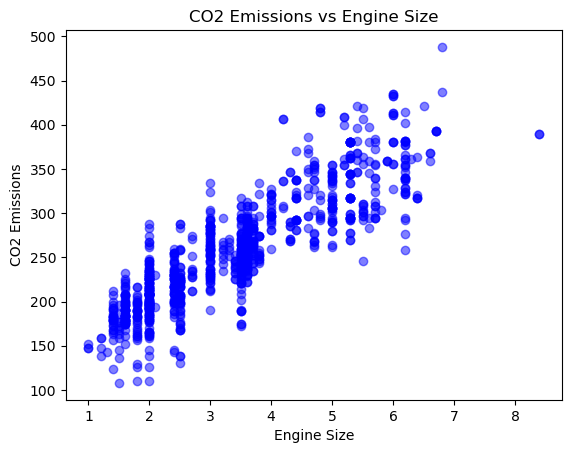

Degree 3: MAE=22.80, RSS=282246.44, R²=0.7820
Degree 4: MAE=22.74, RSS=282787.45, R²=0.7816
Degree 5: MAE=22.81, RSS=283134.32, R²=0.7813


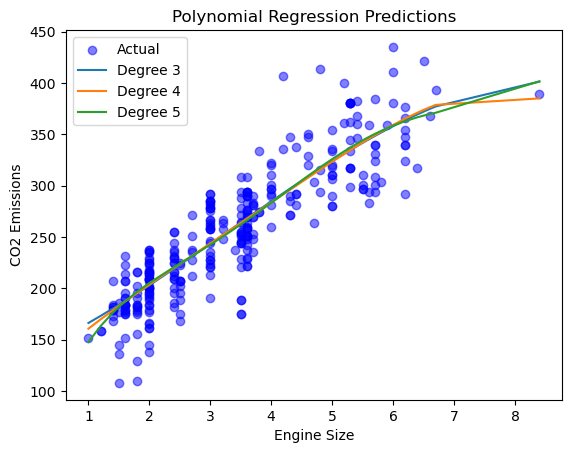

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "C:\\Users\\maths\\Desktop\\ojas_230957162\\fml\\week4\\FuelConsumption.csv"
df = pd.read_csv(file_path)

# Select relevant features
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
df = df[features]

# Scatter plot of CO2 Emissions vs. Engine Size
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color='blue', alpha=0.5)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Emissions vs Engine Size")
plt.show()

# Splitting data (70% training, 30% testing)
X = df[['ENGINESIZE']].values
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train polynomial regression and evaluate
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum((y_test - y_pred) ** 2)
    r2 = r2_score(y_test, y_pred)

    return degree, mae, rss, r2, model, poly

# Try polynomial degrees 3, 4, and 5
results = []
degrees = [3, 4, 5]
for d in degrees:
    results.append(polynomial_regression(d))

# Print evaluation results
for res in results:
    print(f"Degree {res[0]}: MAE={res[1]:.2f}, RSS={res[2]:.2f}, R²={res[3]:.4f}")

# Plot predictions
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
for res in results:
    degree, _, _, _, model, poly = res
    X_sorted = np.sort(X_test, axis=0)
    y_sorted_pred = model.predict(poly.transform(X_sorted))
    plt.plot(X_sorted, y_sorted_pred, label=f"Degree {degree}")

plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()
